#### Introduction
One of the most importan factors to consider when determing the saftey of a neighborhood is the amount of arrests that take place. More arrests are a result of higher crime and therefore a more dangerous neighborhood. In this data set I look at the total amount of arrests over the given time period in a neighborhood and compare the results with other neighborhoods to measure each ones saftey.

Mt. Oliver Neighborhood         2
Outside County                  4
Troy Hill-Herrs Island          5
Outside State                   6
Mt. Oliver Boro                 7
                             ... 
Homewood South               1552
East Allegheny               1653
Carrick                      1676
South Side Flats             2517
Central Business District    2879
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

Neighbohood median: 
266.5


Text(0, 0.5, 'Arrests')

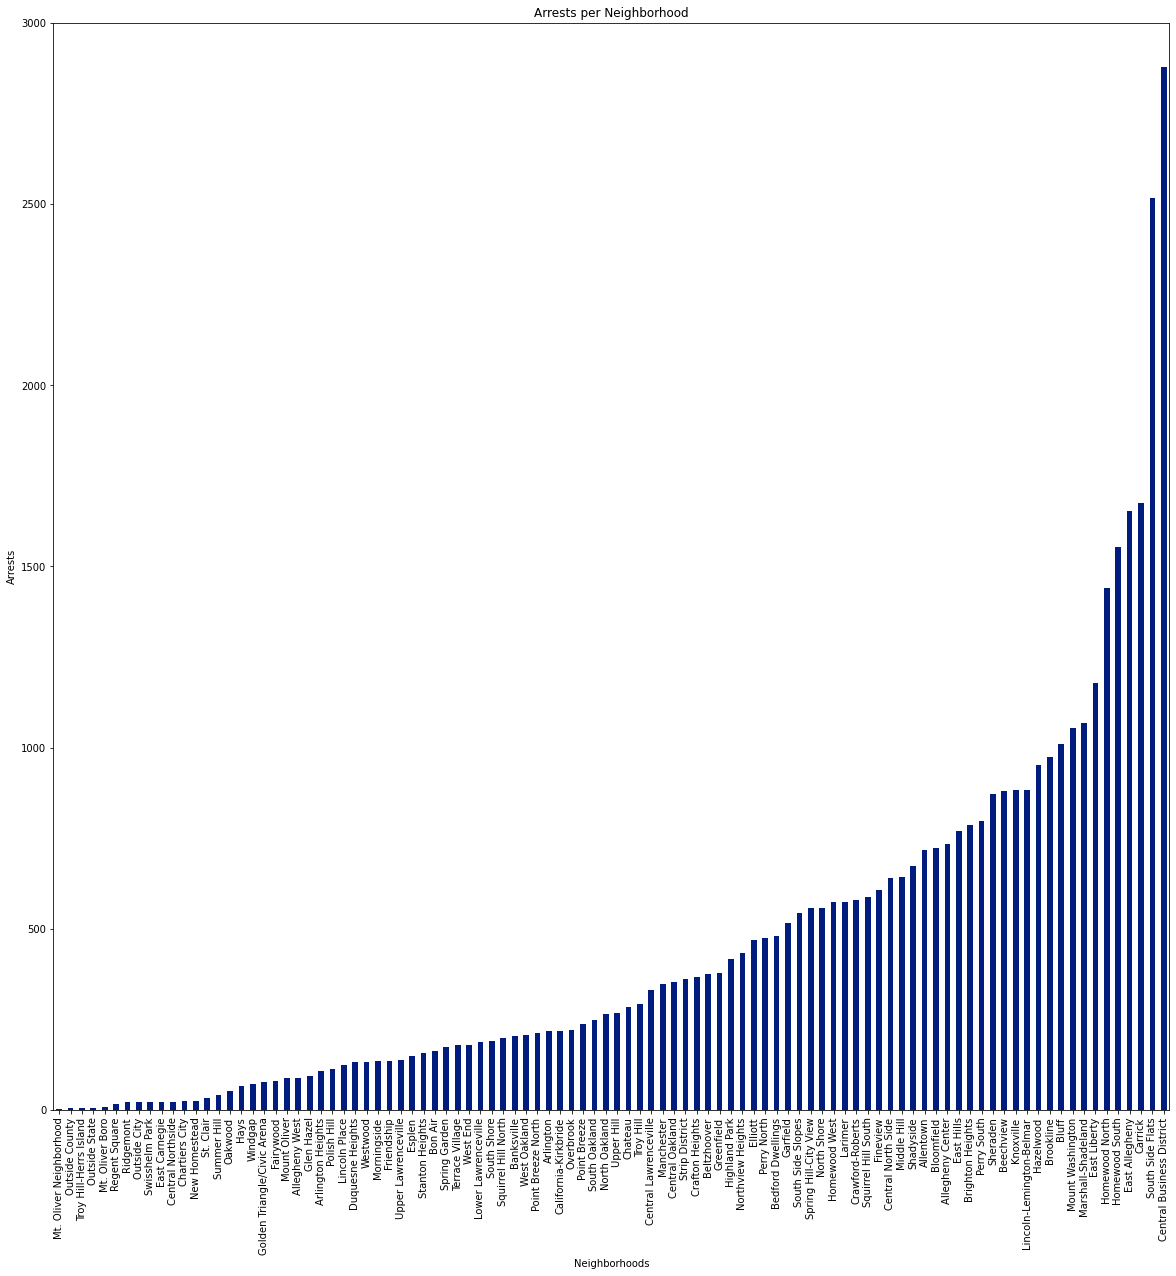

In [5]:
import csv

import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f", index_col = "PK")

data = data.dropna()


data_plot = data['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=True)

median = data['INCIDENTNEIGHBORHOOD'].value_counts().median()

print(data_plot)

print("\nNeighbohood median: ")
print(median)

#Bar Graph
plt.style.use('seaborn-dark-palette')
data_plot.plot.bar(figsize=(20,20), ylim=[0,3000])
plt.title("Arrests per Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Arrests")

        


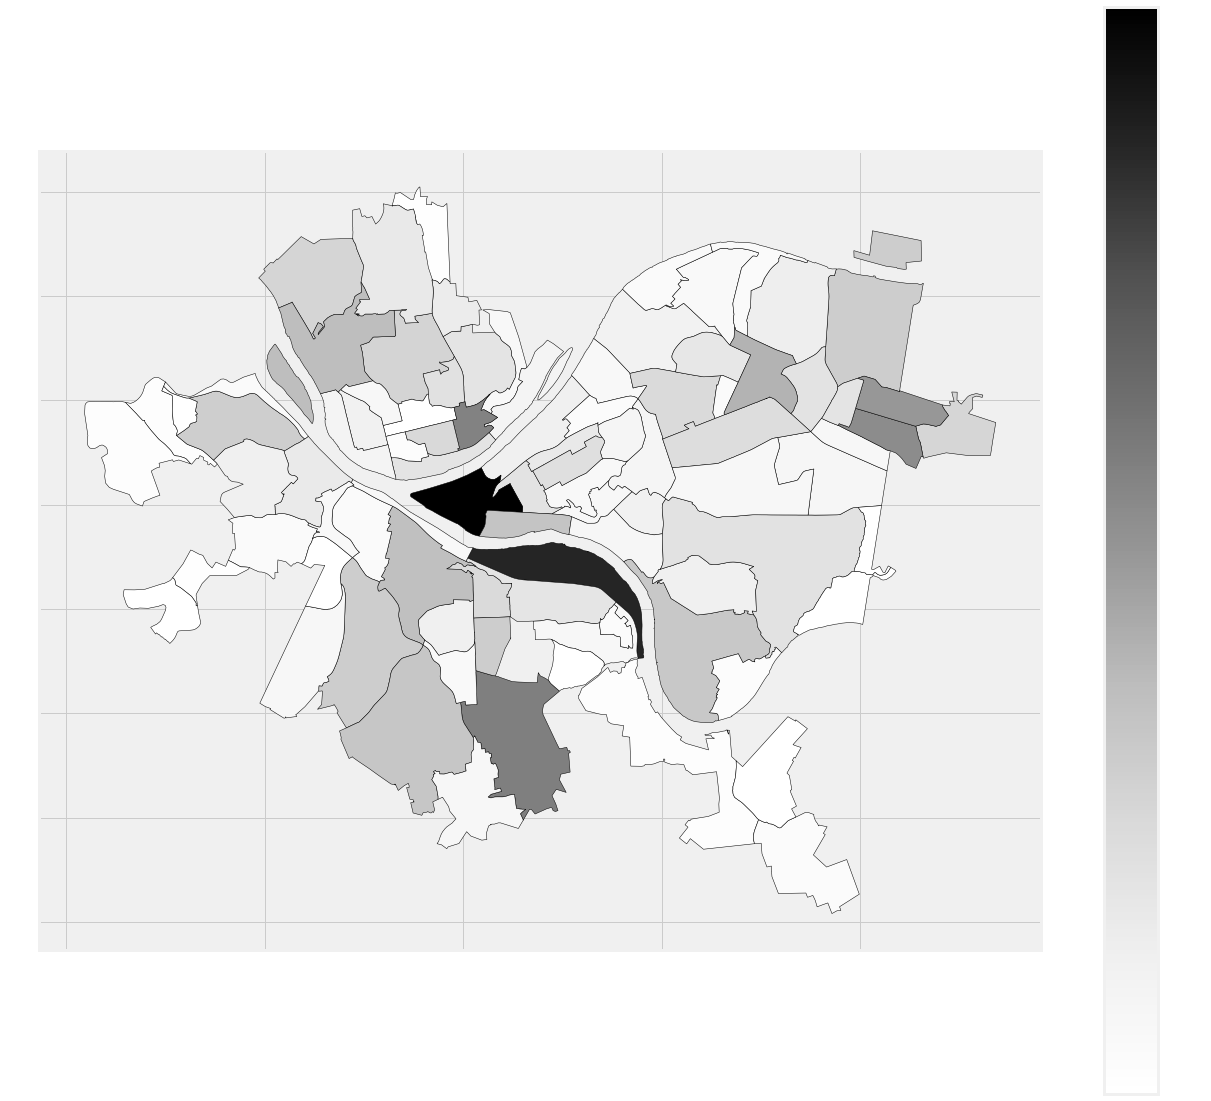

In [22]:
count = 1
data["number_of_arrests"] = count
arrests = data.groupby("INCIDENTNEIGHBORHOOD").sum()["number_of_arrests"]
arrests.sort_values(ascending=False)
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
arrest_map = neighborhoods.merge(arrests, how='left', left_on='hood',right_on='INCIDENTNEIGHBORHOOD')
arrest_map.plot(column='number_of_arrests', cmap='Greys', edgecolor="black", legend=True, legend_kwds = {'label': "Number of Arrests"}, figsize=(20,20))

#### Data Limitations

One of the largest limitations of this data has to do with the population of each neighborhood. Some neighborhoods are going to have higher populations compared to other ones, so it might make sense for one neighborhood to have a higher numbers of arrests.

#### Data Analysis and Conclusion

Since our group is using neighborhood saftey as the metric to determine the best neighborhood, we thought that the number of arrests would be a great indicator of saftey since it is pretty much a direct correlation to the amount of crime. Based on the data from this data set, the neighborhood with the least amount of arrrests is Mt. Oliver at only 2 arrests and the one with the most is the Central Buisness District at 2879. Therefore, based on arrests, Mt. Oliver would be the saftest neighborhood. However there are a few other neighborhoods with a very similar low amount of arrests including Outside County, Troy Hill-Herrs Island, Outside State, and Mt. Oliver Boro